# **Omdena Liverpool Chapter: Vehicle Analysis & Prediction using Machine Learning**

### **Problem Statement:**
  - In-depth analysis of vehicles involved in collisions
  - Create a model to predict the likelihood of specific cohorts being involved in a collision.

### **1. In-depth Analysis of vehicles involved in collisions**


#### **Data Overview:**

The data comes from the Open Data website of the UK government, where they have been published by the Department of Transport.

Initially, the vehicle dataset had been cleaned by removing null values with simple imputations.

#### **Provided dataset:**

`simple_impute_vehicle_data.parquet:` Every instance of records in the file represents the involvement of a unique vehicle in a unique traffic accident, featuring various vehicle and passenger properties as columns. 

The records were collected between 2004-2016 AD. and consists of ~2.0 million records. 

#### **Objectives of Exploratory Data Analysis:**
  1. Structure investigation: Explore the dataset size and features datatypes.
  2. Quality investigation: Explore if duplicates, missing values and unwanted entries exists.
  3. Content investigation: Perform analysis of features mutual depedence or correlations along with discovering the data distribution and data outliers.
  4. Ask bussiness problem related question and discover answers from data by analyzing them.


#### **Features**
    (Note: Original dataset has only 24 features, but while performing imputations 
    extra 15 boolean field columns had been added to signify if the corresponding 
    feature of the particular instance was imputed or not) 

    
    - Accident specific features:
        'Accident_Index'
        'Year'

    - Vehicle specific features:
        'Vehicle_Reference'
        'Towing_and_Articulation'
        'Vehicle_Type'
        'Age_of_Vehicle'
        'Engine_Capacity_.CC.'
        'make'
        'model'
        'Propulsion_Code'
        

    - Condition for vehicle accident specific features:
        'Vehicle_Leaving_Carriageway'
        'Vehicle_LocationRestricted_Lane'
        'Vehicle_Manoeuvre'
        'X1st_Point_of_Impact'
        'Hit_Object_in_Carriageway':
        'Hit_Object_off_Carriageway',
        'Junction_Location',
        'Skidding_and_Overturning',
        
    - Driver specific features:
        'Age_Band_of_Driver'
        'Driver_Home_Area_Type'
        'Driver_IMD_Decile'
        'Journey_Purpose_of_Driver'
        'Sex_of_Driver'
        'Was_Vehicle_Left_Hand_Drive'

    - extra fields:
        '<imputed_feature_column_name>_missing'



# 1. Structural Investigation

### 1.1 Connecting to the google drive for accessing the processed dataset.

In [ ]:
## -------------------------------------------------------------------------------------------------------------
## To run this notebook in google colab:
## 0. Create a folder named: dataset into the root directory called as MyDrive 
##    in the google drive
## 1. Goto:
##    https://drive.google.com/drive/folders/1-8u-WfSxBCKbfahcwgEPPdPUqtuhLWYw
##    for original dataset else to access imputed dataset visit:
##    https://drive.google.com/file/d/19Q7o-CUfySCYpw9DD6L87QB86qUeuhMA/view?usp=sharing
## 2. Right click the simple_impute_vehicle_data.parquet file and select Add 
##    shortcut to drive, then navigate the pop up to select the dataset folder 
##    else download the dataset and reupload to your drive folder.
## 3. Finally, run the notebook in colab and on a pop asking permission to 
##    connect to the drive, hit allow access(select the google account which has
##    the above dataset file)
## --------------------------------------------------------------------------------------------------------------

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 1.2. Setting Path for the Vehicle dataset

In [ ]:
SIMPLE_IMPUTE_VEHICLE_PATH = "/content/drive/MyDrive/dataset/simple_impute_vehicle_data (1).parquet"


### 1.3. Importing required packages for EDA(Exploratory Data Analysis)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)


In [ ]:
im_df =  pd.read_parquet(SIMPLE_IMPUTE_VEHICLE_PATH, engine='pyarrow')
im_df.head()

,Accident_Index,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,X1st_Point_of_Impact,Year,Age_Band_of_Driver_missing,Age_of_Vehicle_missing,Driver_Home_Area_Type_missing,Driver_IMD_Decile_missing,Engine_Capacity_.CC._missing,Hit_Object_in_Carriageway_missing,Hit_Object_off_Carriageway_missing,Journey_Purpose_of_Driver_missing,Junction_Location_missing,make_missing,model_missing,Propulsion_Code_missing,Sex_of_Driver_missing,Skidding_and_Overturning_missing,Was_Vehicle_Left_Hand_Drive_missing,Age_of_Vehicle,Engine_Capacity_.CC.,Age_Band_of_Driver,Driver_Home_Area_Type,Driver_IMD_Decile,Hit_Object_in_Carriageway,Hit_Object_off_Carriageway,Journey_Purpose_of_Driver,Junction_Location,make,model,Propulsion_Code,Sex_of_Driver,Skidding_and_Overturning,Was_Vehicle_Left_Hand_Drive
0,200401BS00001,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,2,109,Front,2004,False,False,False,False,False,True,True,True,True,False,False,False,False,True,True,3.000000,1588.000000,26 - 35,Urban area,4.0,Kerb,Other permanent object,Other/Not known (2005-10),Not at or within 20 metres of junction,ROVER,45 CLASSIC 16V,Petrol,Male,Skidded,No
1,200401BS00002,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,109,Front,2004,False,True,False,False,True,True,True,True,True,False,False,True,False,True,True,7.108262,2042.161115,26 - 35,Urban area,3.0,Kerb,Other permanent object,Other/Not known (2005-10),Not at or within 20 metres of junction,BMW,C1,Petrol,Male,Skidded,No
2,200401BS00003,No tow/articulation,Did not leave carriageway,0.0,Turning right,1,109,Front,2004,False,False,True,True,False,True,True,True,True,False,False,False,False,True,True,4.000000,998.000000,26 - 35,Urban area,3.0,Kerb,Other permanent object,Other/Not known (2005-10),Not at or within 20 metres of junction,NISSAN,MICRA CELEBRATION 16V,Petrol,Male,Skidded,No
3,200401BS00003,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,2,109,Front,2004,False,True,True,True,True,True,True,True,True,False,False,True,False,True,True,7.108262,2042.161115,66 - 75,Urban area,3.0,Kerb,Other permanent object,Other/Not known (2005-10),Not at or within 20 metres of junction,LONDON TAXIS INT,TXII GOLD AUTO,Petrol,Male,Skidded,No
4,200401BS00004,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Motorcycle 125cc and under,Front,2004,False,False,False,False,False,True,True,True,True,False,False,False,False,True,True,1.000000,124.000000,26 - 35,Urban area,4.0,Kerb,Other permanent object,Other/Not known (2005-10),Not at or within 20 metres of junction,PIAGGIO,VESPA ET4,Petrol,Male,Skidded,No


In [ ]:
print("No of samples:", im_df.shape[0])
print("No of columns:", im_df.shape[1])

No of samples: 2172689
No of columns: 39


We have 2172689 samples and 39 features in the `simple_imputed dataset`.

In [ ]:
pd.value_counts(im_df.dtypes)

object     18
bool       15
float64     4
int64       2
dtype: int64

In [ ]:
im_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2172689 entries, 0 to 2177204
Data columns (total 39 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   Accident_Index                       object 
 1   Towing_and_Articulation              object 
 2   Vehicle_Leaving_Carriageway          object 
 3   Vehicle_Location.Restricted_Lane     float64
 4   Vehicle_Manoeuvre                    object 
 5   Vehicle_Reference                    int64  
 6   Vehicle_Type                         object 
 7   X1st_Point_of_Impact                 object 
 8   Year                                 int64  
 9   Age_Band_of_Driver_missing           bool   
 10  Age_of_Vehicle_missing               bool   
 11  Driver_Home_Area_Type_missing        bool   
 12  Driver_IMD_Decile_missing            bool   
 13  Engine_Capacity_.CC._missing         bool   
 14  Hit_Object_in_Carriageway_missing    bool   
 15  Hit_Object_off_Carriageway_missi

The above analysis shows that we have columns of dtypes as object, bool, float64, int64 


* The above analysis shows that we don't have enough numeric features,  most of them are categorical, therefore effective strategy has to be analyzed and used to convert them into numerical values.


* The given dataset comprises of only vehicle, passenger related information which were involved in the accident, that implies we do not have entries apart from vehicles involved in accident, **we have a pure dataset.**

* The problem we are trying to solve seems like a novelty problem. So, exploring data to gather information regarding their importance has to be performed without a target variable.

Column type:
* float64 columns: 4
*  int64 columns : 2
*  boolean columns: 15
*  object/categorical columns: 18








### 1.4 Structure of numerical and non numerical columns

#### Numerical Columns

In [ ]:
im_df.describe().T


,count,mean,std,min,25%,50%,75%,max
Vehicle_Location.Restricted_Lane,2172689.0,0.107248,0.879788,0.0,0.0,0.000000,0.000000,9.0
Vehicle_Reference,2172689.0,1.553519,0.775350,1.0,1.0,1.000000,2.000000,91.0
Year,2172689.0,2010.933269,3.689380,2004.0,2008.0,2011.000000,2014.000000,2016.0
Age_of_Vehicle,2172689.0,7.108262,4.321033,1.0,4.0,7.108262,9.000000,111.0
Engine_Capacity_.CC.,2172689.0,2042.161115,1827.729708,1.0,1360.0,1796.000000,2042.161115,96000.0
Driver_IMD_Decile,2172689.0,4.583191,2.559937,1.0,3.0,3.000000,7.000000,10.0


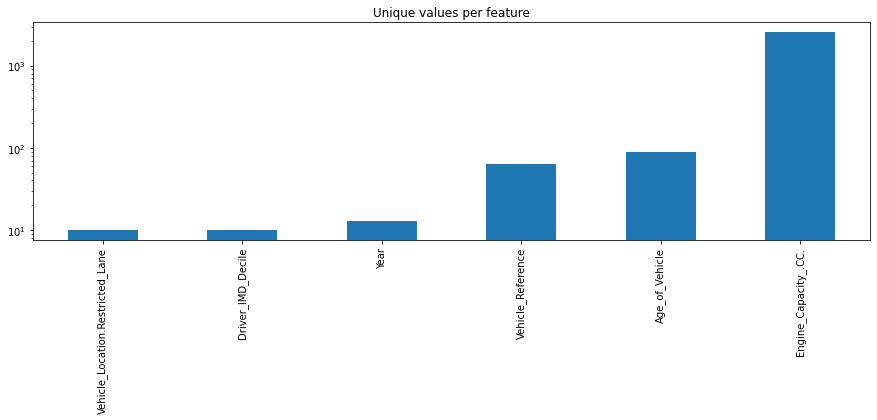

In [ ]:
# For each numerical feature compute number of unique entries
unique_values = im_df.select_dtypes(include="number").nunique().sort_values()

# Plot information with y-axis in log-scale
unique_values.plot.bar(logy=True, figsize=(15, 4), title="Unique values per feature");


We might see a lot of skewness in Engine capacity and age of vehicle features as compared to other numerical features.


#### Non-numerical columns

In [ ]:
im_df.describe(exclude=['number','boolean']).T

,count,unique,top,freq
Accident_Index,2172689,1486290,2013460234852,53
Towing_and_Articulation,2172689,6,No tow/articulation,2133102
Vehicle_Leaving_Carriageway,2172689,9,Did not leave carriageway,1919714
Vehicle_Manoeuvre,2172689,18,Going ahead other,992974
Vehicle_Type,2172689,23,Car,1526770
X1st_Point_of_Impact,2172689,5,Front,1059530
Age_Band_of_Driver,2172689,11,26 - 35,619364
Driver_Home_Area_Type,2172689,3,Urban area,1766718
Hit_Object_in_Carriageway,2172689,11,Kerb,2119031
Hit_Object_off_Carriageway,2172689,11,Other permanent object,2042437


Was_Vehicle_Left_Hand_Drive            0.998215
Towing_and_Articulation                0.981780
Vehicle_Location.Restricted_Lane       0.981669
Hit_Object_in_Carriageway              0.975303
Sex_of_Driver_missing                  0.965416
Skidding_and_Overturning               0.964051
Hit_Object_in_Carriageway_missing      0.959504
make_missing                           0.949609
Junction_Location_missing              0.944624
Was_Vehicle_Left_Hand_Drive_missing    0.942147
dtype: float64

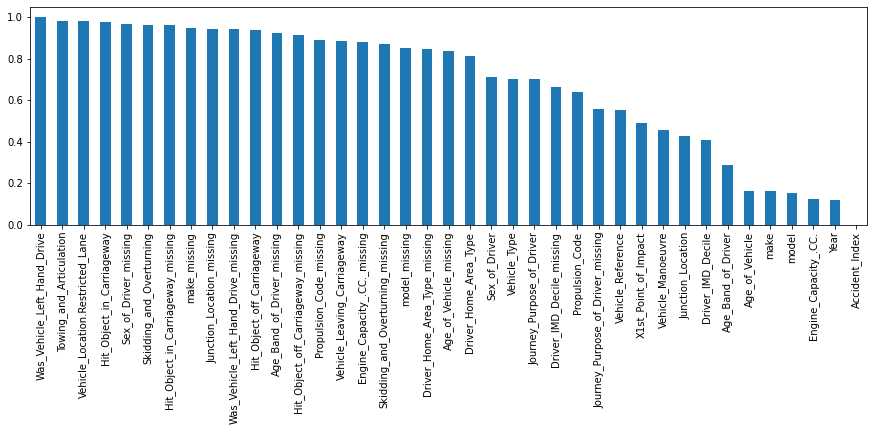

In [ ]:
# get most frequent columns 
most_frequent_entry = im_df.mode()

# Checks for each entry if it contains the most frequent entry
df_freq = im_df.eq(most_frequent_entry.values, axis=1)

# Computes the mean of the 'is_most_frequent' occurrence
df_freq = df_freq.mean().sort_values(ascending=False)


display(df_freq.head(10))

df_freq.plot.bar(figsize=(15, 4));

We can see the top 10 features which have almost repeating value in the whole dataset.
For feature engineering, the following columns can be considered to be removed:
- Was_Vehicle_Left_Hand_Drive  => Right Handed         
- Towing_and_Articulation => No tow/articulation                   
- Hit_Object_in_Carriageway  => kerb           
- Skidding_and_Overturning  => Skidding            


# 2. Quality Investigation

2.1 Looking for duplicate entries in the dataset

In [ ]:
# Duplicates
print("Total duplicates: ", im_df.duplicated().sum())

Total duplicates:  0


2.2 Looking for null/missing entries in the dataset

In [ ]:
# Missing values
print("% Missing Values: \n\n", np.round(100*im_df.isnull().mean().sort_values(ascending=False),2))

% Missing Values: 

 Accident_Index                         0.0
Hit_Object_in_Carriageway              0.0
Skidding_and_Overturning_missing       0.0
Was_Vehicle_Left_Hand_Drive_missing    0.0
Age_of_Vehicle                         0.0
Engine_Capacity_.CC.                   0.0
Age_Band_of_Driver                     0.0
Driver_Home_Area_Type                  0.0
Driver_IMD_Decile                      0.0
Hit_Object_off_Carriageway             0.0
Propulsion_Code_missing                0.0
Journey_Purpose_of_Driver              0.0
Junction_Location                      0.0
make                                   0.0
model                                  0.0
Propulsion_Code                        0.0
Sex_of_Driver                          0.0
Skidding_and_Overturning               0.0
Sex_of_Driver_missing                  0.0
model_missing                          0.0
Towing_and_Articulation                0.0
Age_Band_of_Driver_missing             0.0
Vehicle_Leaving_Carriageway      

This was expected as we are using imputed dataset.

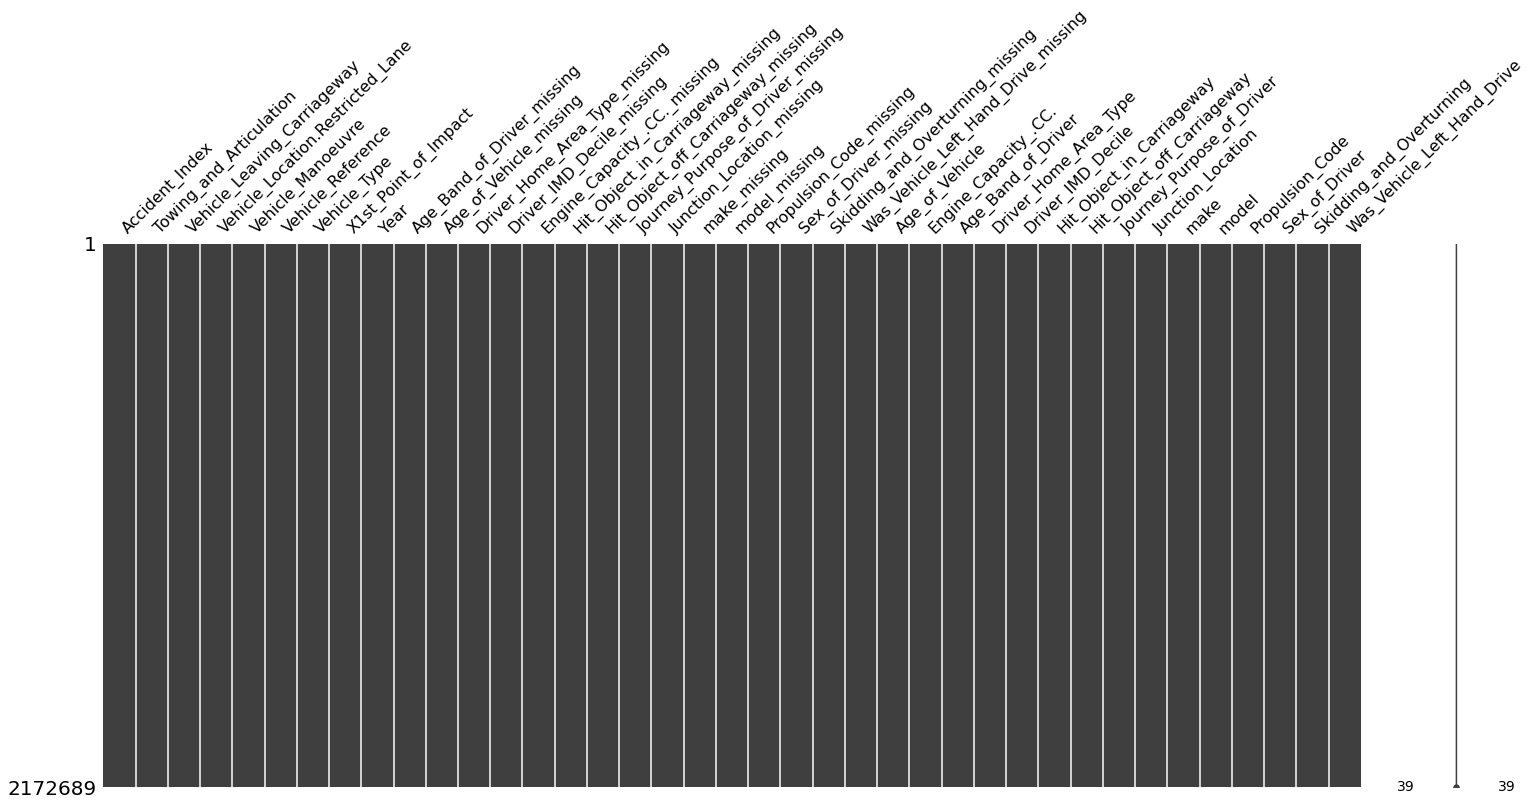

In [ ]:
import missingno as msno

msno.matrix(im_df)
plt.show()

### 3. Content Investigation

#### 3.1 Distribution of feature

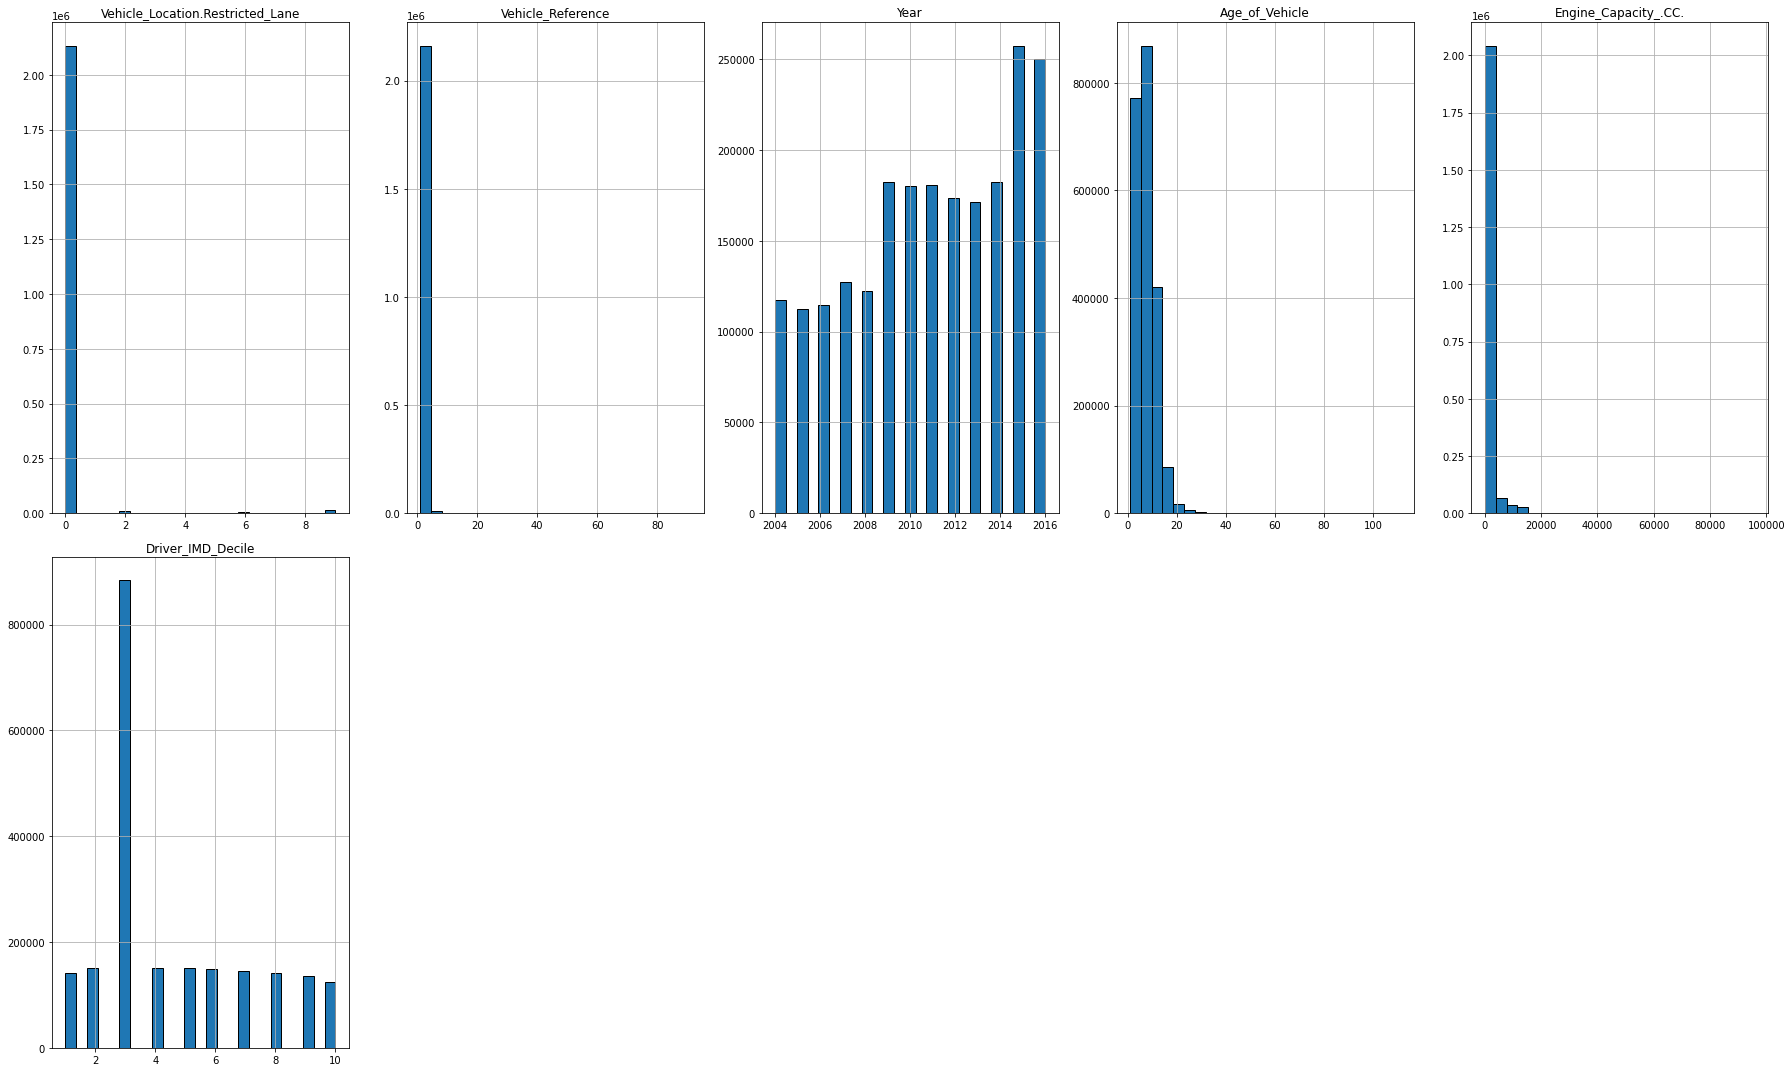

In [ ]:
im_df.hist(bins=25, figsize=(25, 15), layout=(-1, 5), edgecolor="black")
plt.tight_layout()

We can consider to remove some features such as:
- Vehicle location restricted lane => 0
- Vehicle reference(doesn't hold much information as refering to data dictionary)

We can see that number vehicles involved in accidents is continuously rising each year.


3.2 Feature Relationship

In [ ]:
dropcols = [
    "Vehicle_Location.Restricted_Lane",
    "Vehicle_Reference",
    "Driver_IMD_Decile",
    "Was_Vehicle_Left_Hand_Drive",
    "Towing_and_Articulation",
    "Hit_Object_in_Carriageway",
    "Skidding_and_Overturning",
]
im_df.drop(columns=dropcols, inplace=True)


In [ ]:
im_df.corr()

,Year,Age_Band_of_Driver_missing,Age_of_Vehicle_missing,Driver_Home_Area_Type_missing,Driver_IMD_Decile_missing,Engine_Capacity_.CC._missing,Hit_Object_in_Carriageway_missing,Hit_Object_off_Carriageway_missing,Journey_Purpose_of_Driver_missing,Junction_Location_missing,make_missing,model_missing,Propulsion_Code_missing,Sex_of_Driver_missing,Skidding_and_Overturning_missing,Was_Vehicle_Left_Hand_Drive_missing,Age_of_Vehicle,Engine_Capacity_.CC.
Year,1.000000,0.048940,9.469566e-02,-0.028316,0.162548,1.179719e-01,-0.004395,0.019819,0.368393,-0.451354,0.280446,0.004033,1.462416e-01,0.070878,0.056628,-0.451809,1.356422e-01,-6.672963e-02
Age_Band_of_Driver_missing,0.048940,1.000000,8.714890e-02,0.454882,0.256844,1.076349e-01,0.011057,0.067209,0.084651,-0.009354,0.157108,0.075841,1.143283e-01,0.587183,0.080017,-0.008320,1.653340e-02,1.055327e-02
Age_of_Vehicle_missing,0.094696,0.087149,1.000000e+00,0.106670,0.123769,7.664257e-01,0.011599,0.037302,0.038240,0.004728,0.516284,0.307220,8.033707e-01,0.104464,0.021063,0.004884,-1.979268e-15,-6.780976e-03
Driver_Home_Area_Type_missing,-0.028316,0.454882,1.066702e-01,1.000000,0.596003,1.218732e-01,0.003634,0.036658,0.062706,0.081684,0.155228,0.107529,1.247533e-01,0.396085,0.042658,0.082451,-3.055622e-03,2.839131e-02
Driver_IMD_Decile_missing,0.162548,0.256844,1.237690e-01,0.596003,1.000000,1.423367e-01,-0.004615,0.007304,0.129360,0.020463,0.218514,0.123224,1.483125e-01,0.236611,0.020469,0.021419,5.661134e-03,1.601583e-02
Engine_Capacity_.CC._missing,0.117972,0.107635,7.664257e-01,0.121873,0.142337,1.000000e+00,0.013444,0.041930,0.048242,0.007674,0.611884,0.437793,9.564573e-01,0.126995,0.024240,0.008433,1.848748e-02,3.391458e-15
Hit_Object_in_Carriageway_missing,-0.004395,0.011057,1.159902e-02,0.003634,-0.004615,1.344421e-02,1.000000,0.196149,-0.011780,-0.000477,0.002441,0.009412,1.089672e-02,0.000344,0.143543,-0.000098,-2.465476e-02,2.119086e-02
Hit_Object_off_Carriageway_missing,0.019819,0.067209,3.730216e-02,0.036658,0.007304,4.192986e-02,0.196149,1.000000,0.004030,-0.002146,0.033052,0.043284,3.817901e-02,0.040919,0.347352,-0.001288,-3.740425e-02,2.708233e-02
Journey_Purpose_of_Driver_missing,0.368393,0.084651,3.824036e-02,0.062706,0.129360,4.824237e-02,-0.011780,0.004030,1.000000,0.270582,0.147016,-0.028171,6.355105e-02,0.093376,0.036960,0.275921,1.227918e-01,-1.327288e-01
Junction_Location_missing,-0.451354,-0.009354,4.728083e-03,0.081684,0.020463,7.674139e-03,-0.000477,-0.002146,0.270582,1.000000,-0.055636,0.047709,-6.225191e-03,-0.011222,-0.026183,0.974410,-2.781664e-02,2.788939e-02


### Question Answering



1. What was the direction of most of the vehicles during accident?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text major ticklabel objects>)

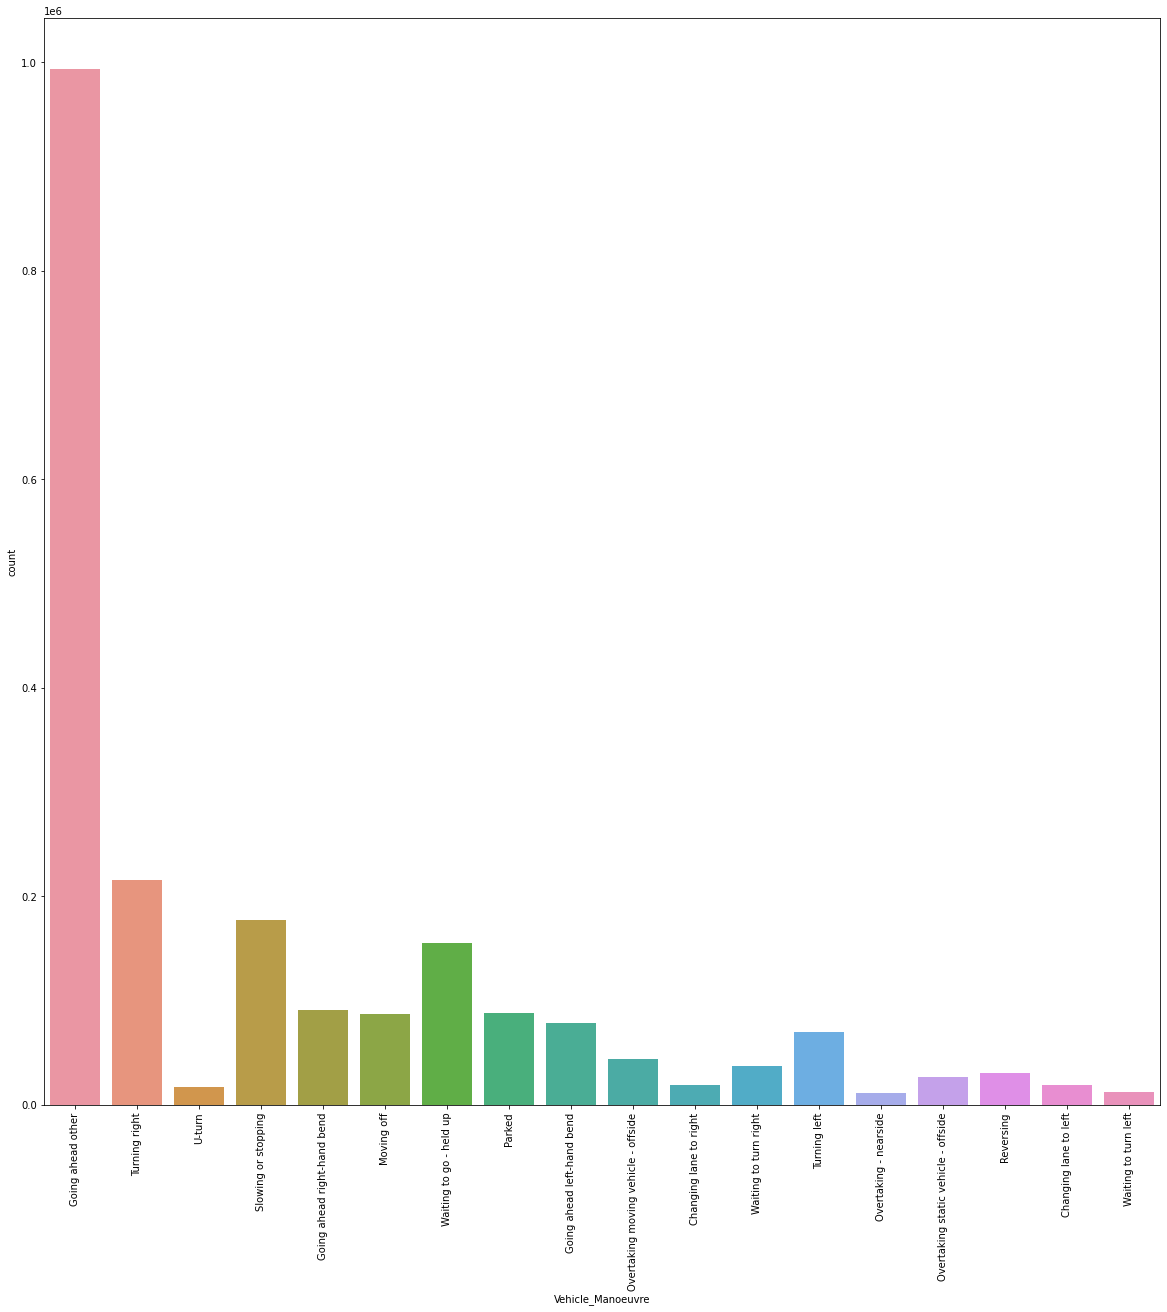

In [ ]:
plt.figure(figsize=(20,20))
sns.countplot(x=im_df['Vehicle_Manoeuvre'])
plt.xticks(rotation=90)

Seems like most of the accident happened while going ahead of others.

2. Which company's vehicle is involved in most of the accidents?

In [ ]:
(im_df['make'].value_counts() / im_df.shape[0]) * 100


VAUXHALL             16.055910
FORD                 10.897510
PEUGEOT               5.816755
VOLKSWAGEN            5.553119
RENAULT               5.253536
                       ...    
POCLAIN               0.000046
THINK                 0.000046
JORDAN                0.000046
KINGTON               0.000046
ERIK BUELL RACING     0.000046
Name: make, Length: 535, dtype: float64

Vauxhall, Ford, Peugeot, Volkswagen, Renault make about 40% accidents in whole dataset.

In [ ]:
im_df.groupby(['make','model'])['Accident_Index'].count()



make    model              
ABARTH  500                    90
        500 C                   5
        500 C S-A              13
        500 CUSTOM              3
        500 S-A                 1
                               ..
ZONTES  MANTIS 125 ZT 125-E     2
        TIGER 50                4
        ZT 125-3A TIGER        62
        ZT 125-5A MONSTER      38
        ZT 125-8A PANTHER      35
Name: Accident_Index, Length: 36401, dtype: int64

3. What is the mean age of the vehicles involved in accidents?

In [ ]:
pd.DataFrame((im_df['Age_of_Vehicle'].astype('int').value_counts() / im_df.shape[0]) * 100).head(10)


,Age_of_Vehicle
7,22.379365
1,8.287012
2,7.402210
3,6.832317
4,6.640159
5,6.363497
6,6.182707
8,5.857350
9,5.574751
10,5.214368


Older aged vehicles are less likely to be involved in collisions. Whereas, new vehicle and vehicles aged near 7 are more likely to be in collisions 

4. Type of Vehicle to be involved in most accidents?


In [ ]:
(im_df['Vehicle_Type'].value_counts() / im_df.shape[0]) * 100


Car                                      70.270987
Van / Goods 3.5 tonnes mgw or under       5.396170
109                                       3.773435
Bus or coach (17 or more pass seats)      3.525125
Motorcycle over 500cc                     3.287539
Motorcycle 125cc and under                2.828707
Goods 7.5 tonnes mgw and over             2.545693
Taxi/Private hire car                     2.013081
Pedal cycle                               1.778625
Motorcycle 50cc and under                 1.030014
Motorcycle over 125cc and up to 500cc     0.963967
Goods over 3.5t. and under 7.5t           0.838362
Other vehicle                             0.641095
106                                       0.341973
Agricultural vehicle                      0.276386
Minibus (8 - 16 passenger seats)          0.271277
Goods vehicle - unknown weight            0.084780
108                                       0.060478
Motorcycle - unknown cc                   0.033599
Mobility scooter               

Its seems clear that nearly 70% accidents are car accidents, so what is it that makes car accident more prevalent?

In [ ]:
im_df["Vehicle_Location.Restricted_Lane"].value_counts(normalize=True)

0.0    0.981669
9.0    0.006431
2.0    0.004463
6.0    0.002733
8.0    0.001262
4.0    0.001113
3.0    0.000683
7.0    0.000599
5.0    0.000552
1.0    0.000496
Name: Vehicle_Location.Restricted_Lane, dtype: float64

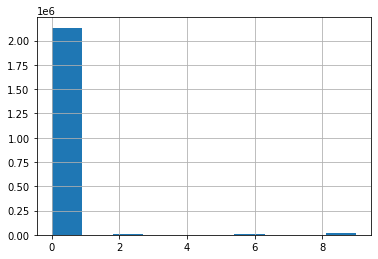

In [ ]:
im_df["Vehicle_Location.Restricted_Lane"].hist()

- "Vehicle_Location.Restricted_Lane" itself is a categorical feature with encoded values ranging from 0 to 10 (but the column value is rather in float)
- We have have "Vehicle_Location.Restricted_Lane" with value 0 : On main c'way - not in restricted lane 
- it is better to drop this feature/use for test dataset as we see 0 holds about 98% occurances in whole dataset

In [ ]:
im_df.Vehicle_Reference.value_counts()[:5]

1    1199463
2     807576
3     125391
4      28474
5       7203
Name: Vehicle_Reference, dtype: int64

Vehicle reference: unique value for each vehicle in a singular accident. Can be used to join a Casualty to a vehicle

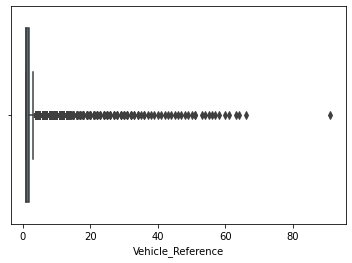

In [ ]:
sns.boxplot(data=im_df, x='Vehicle_Reference')


In [ ]:
im_df[im_df.Vehicle_Reference == 1].head(3)

,Accident_Index,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,X1st_Point_of_Impact,Year,Age_Band_of_Driver_missing,Age_of_Vehicle_missing,Driver_Home_Area_Type_missing,Driver_IMD_Decile_missing,Engine_Capacity_.CC._missing,Hit_Object_in_Carriageway_missing,Hit_Object_off_Carriageway_missing,Journey_Purpose_of_Driver_missing,Junction_Location_missing,make_missing,model_missing,Propulsion_Code_missing,Sex_of_Driver_missing,Skidding_and_Overturning_missing,Was_Vehicle_Left_Hand_Drive_missing,Age_of_Vehicle,Engine_Capacity_.CC.,Age_Band_of_Driver,Driver_Home_Area_Type,Driver_IMD_Decile,Hit_Object_in_Carriageway,Hit_Object_off_Carriageway,Journey_Purpose_of_Driver,Junction_Location,make,model,Propulsion_Code,Sex_of_Driver,Skidding_and_Overturning,Was_Vehicle_Left_Hand_Drive
1,200401BS00002,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,109,Front,2004,False,True,False,False,True,True,True,True,True,False,False,True,False,True,True,7.108262,2042.161115,26 - 35,Urban area,3.0,Kerb,Other permanent object,Other/Not known (2005-10),Not at or within 20 metres of junction,BMW,C1,Petrol,Male,Skidded,No
2,200401BS00003,No tow/articulation,Did not leave carriageway,0.0,Turning right,1,109,Front,2004,False,False,True,True,False,True,True,True,True,False,False,False,False,True,True,4.000000,998.000000,26 - 35,Urban area,3.0,Kerb,Other permanent object,Other/Not known (2005-10),Not at or within 20 metres of junction,NISSAN,MICRA CELEBRATION 16V,Petrol,Male,Skidded,No
4,200401BS00004,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Motorcycle 125cc and under,Front,2004,False,False,False,False,False,True,True,True,True,False,False,False,False,True,True,1.000000,124.000000,26 - 35,Urban area,4.0,Kerb,Other permanent object,Other/Not known (2005-10),Not at or within 20 metres of junction,PIAGGIO,VESPA ET4,Petrol,Male,Skidded,No


In [ ]:
im_df[im_df.Vehicle_Reference == 1][["make","model"]].head()

,make,model
1,BMW,C1
2,NISSAN,MICRA CELEBRATION 16V
4,PIAGGIO,VESPA ET4
6,PIAGGIO,VESPA GT 125
7,BMW,R1100 RT


This shows that each vehicle reference id, does not correspond to unique vehicle
Moreover, the vehicle id feature can be considered to drop. 

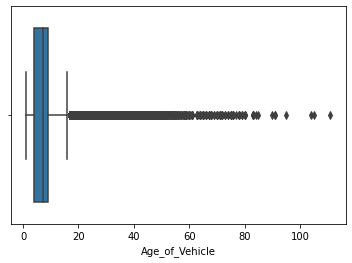

In [ ]:
sns.boxplot(data=im_df, x='Age_of_Vehicle')


In [ ]:
im_df.Age_of_Vehicle.skew()

1.338018187542452

In [ ]:
im_df.Age_of_Vehicle.value_counts(normalize=True)*100

7.108262      16.399632
1.000000       8.287012
2.000000       7.402210
3.000000       6.832317
4.000000       6.640159
                ...    
104.000000     0.000046
90.000000      0.000046
105.000000     0.000046
84.000000      0.000046
111.000000     0.000046
Name: Age_of_Vehicle, Length: 89, dtype: float64

 - From above we can see the mean age is 7 years, with deviation of about 4 years, older vehicles are less likely to be involved in an accident.
 - vehicles of age between 1 to 7 holds about 43% of whole dataset


In [ ]:
im_df["Engine_Capacity_.CC."].value_counts(normalize=True)*100

2042.161115    12.157193
1598.000000     4.916856
1997.000000     2.685612
1998.000000     2.623569
1242.000000     2.541321
                 ...    
1982.000000     0.000046
9464.000000     0.000046
3233.000000     0.000046
4056.000000     0.000046
2632.000000     0.000046
Name: Engine_Capacity_.CC., Length: 2554, dtype: float64

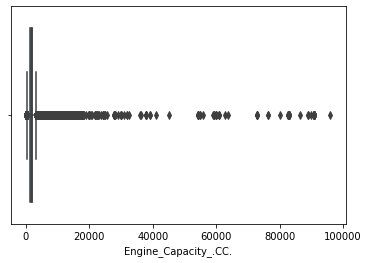

In [ ]:
sns.boxplot(data=im_df, x='Engine_Capacity_.CC.')


In [ ]:
im_df["Engine_Capacity_.CC."].skew()

5.911487183952861

In [ ]:
im_df["Engine_Capacity_.CC."].max()

In [ ]:
im_df["Engine_Capacity_.CC."].min()

Accident Index

In [ ]:
im_df.Accident_Index.value_counts().sort_values(ascending=False)

we have an accident involving 53 vehicles maximum, but we may not need the feature column for further analysis. 



## **References:**
  1. https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/995423/stats20-2011.pdf
  2. https://drive.google.com/file/d/1ndPCHUyO4ZajxA2qWPnpM6N_2anKiIfr/view




### Credits
Shrawan, Faizan, Hasaan, Retin, et al (Group 4- vehicle analysis team)